# Programming exercises from Chapter 5

Import dependencies:

In [1]:
import re, string
import numpy as np
import matplotlib.pyplot as plt

Define helper functions to extract properties from output files:

In [2]:
def extract_properties(regex_match):
    properties = {}
    properties["step"] = int(regex_match.group(1))
    properties["time"] = float(regex_match.group(2))
    properties["etot"] = float(regex_match.group(3))
    properties["ekin"] = float(regex_match.group(4))
    properties["epot"] = float(regex_match.group(5))
    properties["vir"] = float(regex_match.group(6))
    properties["pressure"] = float(regex_match.group(7))
    properties["scalet"] = float(regex_match.group(8))
    return properties

def find_properties(file, preceding_pattern):
    """
    This function first searches for preceding_pattern, and the next occurrence of
    a line containing properties is returned as a dictionary.
    """
    property_pattern = re.compile(r" +([0-9]+) +([0-9Ee\+-\.]+) +([0-9Ee\+-\.]+) +([0-9Ee\+-\.]+) +([0-9Ee\+-\.]+) +([0-9Ee\+-\.]+) +([0-9Ee\+-\.]+) +([0-9Ee\+-\.]+)")
    while True:
        line = file.readline()
        if preceding_pattern.search(line) != None:
            break
    while True:
        line = file.readline()
        m = property_pattern.search(line)
        if m != None:
            p = extract_properties(m)
            return p

def get_averages(filename):
    with open(filename, 'r') as f:
        pattern1 = re.compile("Averages:")
        return find_properties(f, pattern1)
    
def get_fluctuations(filename):
    with open(filename, 'r') as f:
        pattern1 = re.compile("Root mean square fluctuations:")
        return find_properties(f, pattern1)

def get_runtime(filename):
    with open(filename, 'r') as f:
        content = f.read()
        pattern1 = re.compile("Time spent for MD iterations: ([0-9Ee\+-\.]+) sec")
        match = re.search("Time spent for MD iterations: ([0-9Ee\+-\.]+) sec", content, flags=re.MULTILINE)
        time = float(match.group(1))
        return time


## Exercise 1

In [3]:
num_steps = [100, 200, 500, 1000, 2000, 5000, 10000, 20000]
etot = {}
epot = {}
ekin = {}
d_epot = {}
d_ekin = {}
d_etot = {}
for type in "float", "double", "long":
    etot[type] = []
    d_etot[type] = []
    ekin[type] = []
    d_ekin[type] = []
    epot[type] = []
    d_epot[type] = []
    for x in num_steps:
        averages = get_averages("ex1/calculations_dir/" + type + "_" + str(x) + ".out")
        fluctuations = get_fluctuations("ex1/calculations_dir/" + type + "_" + str(x) + ".out")
        etot[type].append(averages["etot"])
        d_etot[type].append(fluctuations["etot"])
        epot[type].append(averages["epot"])
        d_epot[type].append(fluctuations["epot"])
        ekin[type].append(averages["ekin"])
        d_ekin[type].append(fluctuations["ekin"])

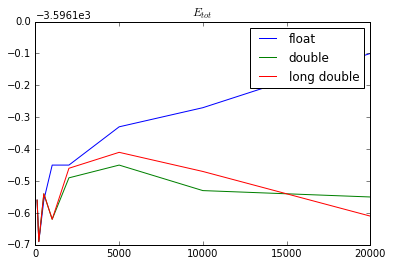

In [4]:
plt.plot(num_steps, etot["float"], label="float")
plt.plot(num_steps, etot["double"], label="double")
plt.plot(num_steps, etot["long"], label="long double")
plt.title(r"$E_{tot}$")
plt.legend()
plt.show()

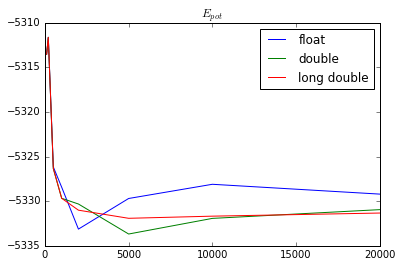

In [5]:
plt.plot(num_steps, epot["float"], label="float")
plt.plot(num_steps, epot["double"], label="double")
plt.plot(num_steps, epot["long"], label="long double")
plt.title(r"$E_{pot}$")
plt.legend()
plt.show()

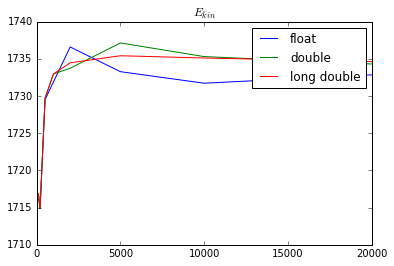

In [6]:
plt.plot(num_steps, ekin["float"], label="float")
plt.plot(num_steps, ekin["double"], label="double")
plt.plot(num_steps, ekin["long"], label="long double")
plt.title(r"$E_{kin}$")
plt.legend()
plt.show()

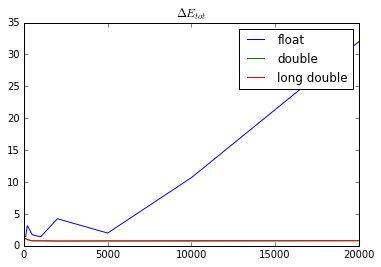

In [7]:
plt.plot(num_steps, d_etot["float"], label="float")
plt.plot(num_steps, d_etot["double"], label="double")
plt.plot(num_steps, d_etot["long"], label="long double")
plt.title(r"$\Delta E_{tot}$")
plt.legend()
plt.show()

## Exercise 2

In [8]:
time_step = [0.02, 0.01, 0.005, 0.002, 0.001]
d_etot = []
d_ekin = []
fraction = []
for x in time_step:
    fluctuations = get_fluctuations("ex2/calculations_dir/" + str(x) + ".out")
    fraction.append(fluctuations["etot"] / fluctuations["ekin"])

[1.4938902060915555, 0.03572175633656836, 0.02586873959137252, 0.026719039049394558, 0.029665482901631606]


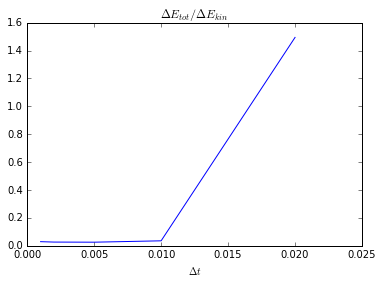

In [9]:
print(fraction)
plt.plot(time_step, fraction)
plt.title(r"$\Delta E_{tot} / \Delta E_{kin}$")
plt.xlabel(r"$\Delta t$")
#plt.axhline(y=0.05, color='r')
plt.show()

## Exercise 3

### TIme dependency

In [10]:
number_atoms = [125, 216, 343, 512, 729, 1000]

Get the times from the constant volume calculations:

In [11]:
runtimes = []
for x in number_atoms:
    runtime = get_runtime("ex3/calculations_dir/constant_volume/" + str(x) + "_run.out")
    runtimes.append(runtime)

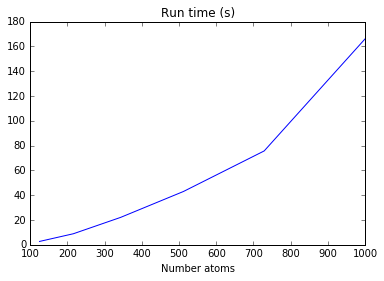

In [12]:
plt.plot(number_atoms, runtimes)
plt.title(r"Run time (s)")
plt.xlabel(r"Number atoms")
plt.show()

### Properties

Radial distribution:

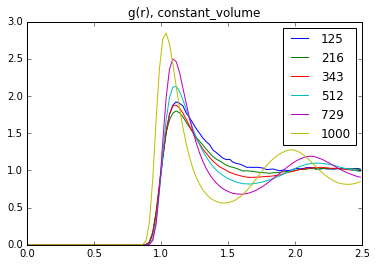

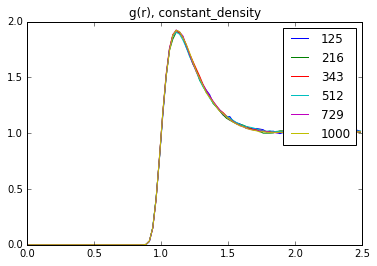

In [13]:
for type in "constant_volume", "constant_density":
    dir = 'ex3/calculations_dir/' + type + '/'
    for x in number_atoms:
        filename = dir + 'gr_' + str(x) + '.dat'
        data = np.loadtxt(filename)
        plt.plot(data[:,0], data[:,1], label=str(x))
    plt.title("g(r), " + type)
    plt.legend()
    plt.show()

Energies per atom, pressure:

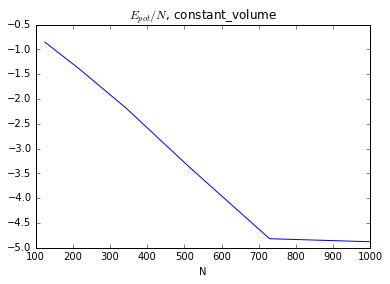

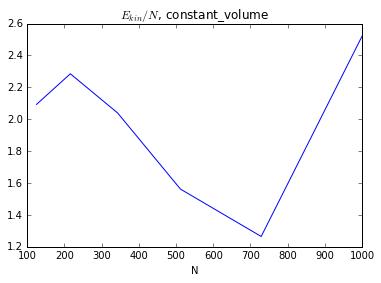

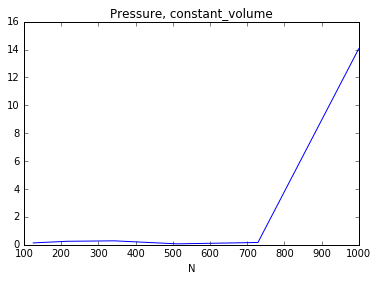

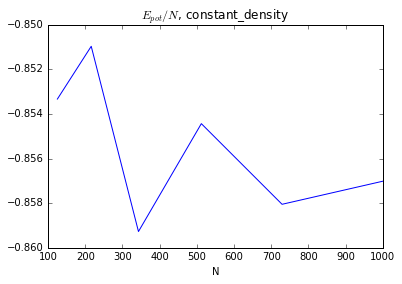

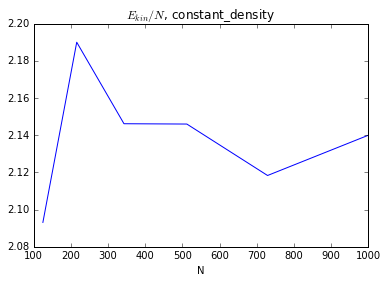

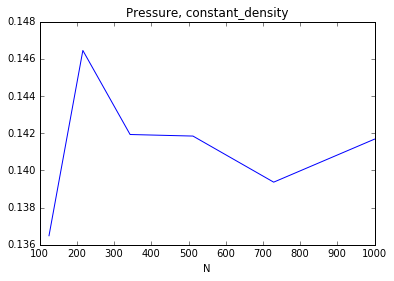

In [14]:
for type in "constant_volume", "constant_density":
    dir = 'ex3/calculations_dir/' + type + '/'
    epot = []
    ekin = []
    pressure = []
    for x in number_atoms:
        output_filename = dir + str(x) + '_run.out'
        averages = get_averages(output_filename)
        epot.append(averages["epot"] / x)
        ekin.append(averages["ekin"] / x)
        pressure.append(averages["pressure"])
    # plot epot
    plt.plot(number_atoms, epot)
    plt.title(r"$E_{pot} / N$, " + type)
    plt.xlabel(r"N")
    plt.show()
    # plot ekin
    plt.plot(number_atoms, ekin)
    plt.title(r"$E_{kin} / N$, " + type)
    plt.xlabel(r"N")
    plt.show()
    # plot pressure
    plt.plot(number_atoms, pressure)
    plt.title(r"Pressure, " + type)
    plt.xlabel(r"N")
    plt.show()

## Exercise 4

### TIme dependency

In [15]:
cutoffs = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [16]:
runtimes = []
for x in cutoffs:
    runtime = get_runtime("ex4/calculations_dir/" + str(x) + ".out")
    runtimes.append(runtime)

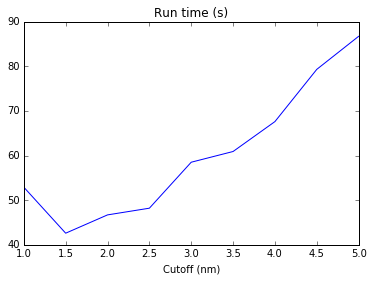

In [17]:
plt.plot(cutoffs, runtimes)
plt.title(r"Run time (s)")
plt.xlabel(r"Cutoff (nm)")
plt.show()

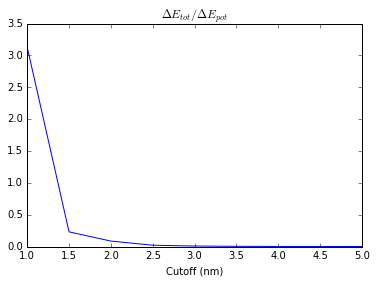

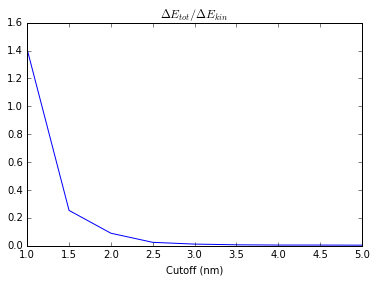

In [18]:
dir = 'ex4/calculations_dir/'
d_etot_by_d_ekin = []
d_etot_by_d_epot = []
for x in cutoffs:
    output_filename = dir + str(x) + '.out'
    fluctuations = get_fluctuations(output_filename)
    d_etot_by_d_ekin.append(fluctuations["etot"] / fluctuations["ekin"])
    d_etot_by_d_epot.append(fluctuations["etot"] / fluctuations["epot"])
# plot d_etot / d_epot
plt.plot(cutoffs, d_etot_by_d_epot)
plt.title(r"$\Delta E_{tot} / \Delta E_{pot}$")
plt.xlabel(r"Cutoff (nm)")
#plt.axhline(y=0.05, color='r')
plt.show()
# plot d_etot / d_ekin
plt.plot(cutoffs, d_etot_by_d_ekin)
plt.title(r"$\Delta E_{tot} / \Delta E_{kin}$")
plt.xlabel(r"Cutoff (nm)")
#plt.axhline(y=0.05, color='r')
plt.show()

## Exercise 5

Fig. 2 from Ref. 4:

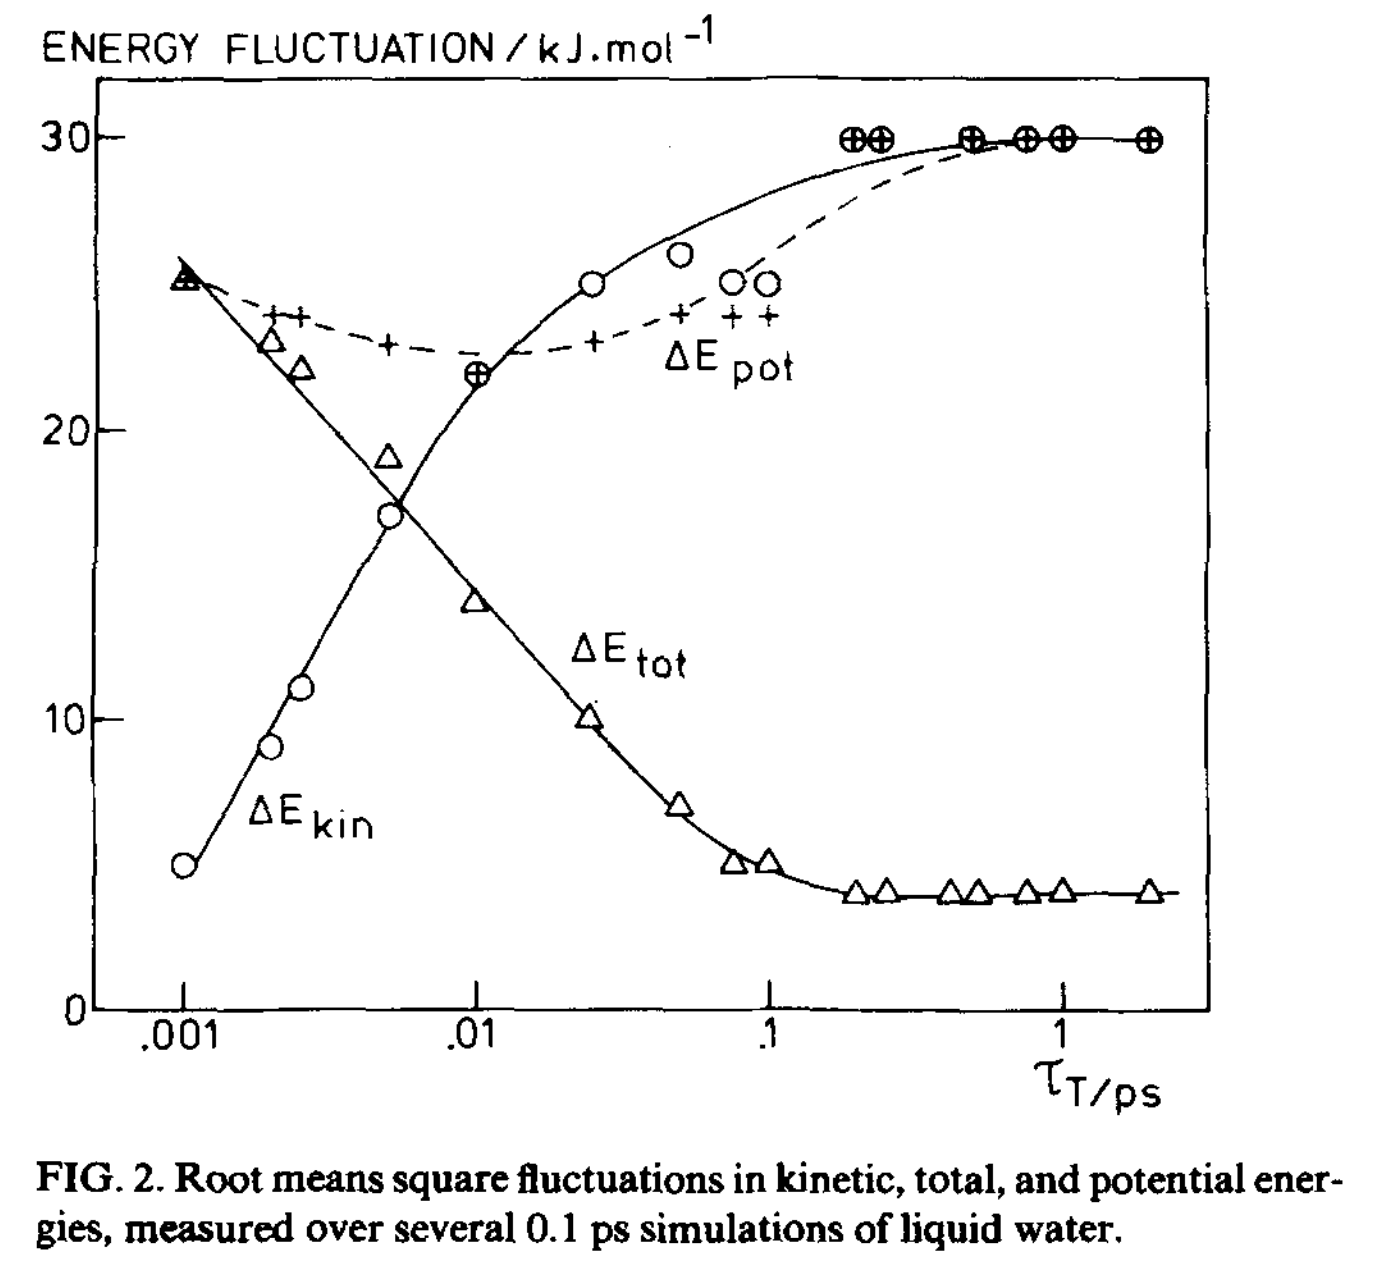

In [19]:
from IPython.display import Image
Image(filename='energy_fluctuation_ref4.png') 

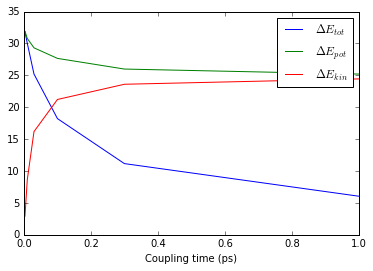

In [20]:
coupling_times = [0.003, 0.01, 0.03, 0.1, 0.3, 1.0]
dir = 'ex5/calculations_dir/'
d_etot = []
d_epot = []
d_ekin = []
for x in coupling_times:
    output_filename = dir + str(x) + '.out'
    fluctuations = get_fluctuations(output_filename)
    d_etot.append(fluctuations["etot"])
    d_ekin.append(fluctuations["ekin"])
    d_epot.append(fluctuations["epot"])
# plots
plt.plot(coupling_times, d_etot, label=r"$\Delta E_{tot}$")
plt.plot(coupling_times, d_epot, label=r"$\Delta E_{pot}$")
plt.plot(coupling_times, d_ekin, label=r"$\Delta E_{kin}$")
plt.legend()
plt.xlabel(r"Coupling time (ps)")
plt.show()

## Exercise 6

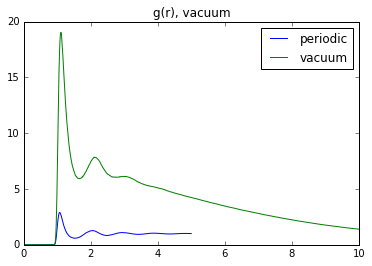

In [21]:
dir = 'ex6/calculations_dir/'
for type in "periodic", "vacuum":
    filename = dir + 'gr_' + type + '.dat'
    data = np.loadtxt(filename)
    plt.plot(data[:,0], data[:,1], label=type)
plt.title("g(r), " + type)
plt.legend()
plt.show()

In [22]:
averages_periodic = get_averages(dir + "periodic.out")
averages_vacuum = get_averages(dir + "vacuum.out")
print("Etot:\nPeriodic: " + str(averages_periodic["etot"]) + "\nVacuum: " + str(averages_vacuum["etot"]) + "\n")
print("Epot:\nPeriodic: " + str(averages_periodic["epot"]) + "\nVacuum: " + str(averages_vacuum["epot"]) + "\n")
print("Ekin:\nPeriodic: " + str(averages_periodic["ekin"]) + "\nVacuum: " + str(averages_vacuum["ekin"]))

Etot:
Periodic: -4002.26
Vacuum: -447.592

Epot:
Periodic: -5498.85
Vacuum: -1946.15

Ekin:
Periodic: 1496.59
Vacuum: 1498.56
